In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import re
%matplotlib inline

QUESTIONS:
How do we read in the data set and only skip certain rows?

COLUMN TO-DO:  
jobid - can stay as object. Range from 8 characters (no array) to 13 characters (4 digit array numbers) 
QUESTION - Are observations with longer lengths more likely to fail?
account, user - didn't investigate. Might come in handy if we see certain accounts/users have repeated problems.  
reqmem - HELP - split at M, so we can convert memory to integer, and separate by requests per core and per node. 
TO-DO - Group column by Mn and Mc, convert Mn values to the Mc values
usedmem - remove M, convert to float. Vast majority are below 1,000  
reqtime, usedtime - convert to datetime format.   
nodes, cpus - remain as integers, should be easy to use  
partition - keep as ojbect, should be easy to use  
exitcode - vast majority will be 0:0, but we need to find problems. Split into 2 columns??  
TO-DO - separate into columns, identify rows with failures
state - keep as ojbect, should be easy to use  
TO-DO - any correlation to exit codes?
nodelist - didn't get to

GROUP SESSION:
Intro: Weekly schedule - working between Thursday/Saturday? when is good time to meet?
Review work
Any major foreseeable problems?
Determine first phase of work, split values

In [40]:
accre = pd.read_csv('../data/accre-jobs-2020.csv', error_bad_lines=False)
accre

b'Skipping line 3461: expected 13 fields, saw 15\nSkipping line 3462: expected 13 fields, saw 16\nSkipping line 3465: expected 13 fields, saw 15\nSkipping line 3468: expected 13 fields, saw 16\nSkipping line 3472: expected 13 fields, saw 15\nSkipping line 3476: expected 13 fields, saw 16\nSkipping line 3479: expected 13 fields, saw 14\nSkipping line 3482: expected 13 fields, saw 14\nSkipping line 3486: expected 13 fields, saw 14\nSkipping line 3490: expected 13 fields, saw 14\nSkipping line 3494: expected 13 fields, saw 14\nSkipping line 3495: expected 13 fields, saw 16\nSkipping line 3497: expected 13 fields, saw 14\nSkipping line 3498: expected 13 fields, saw 14\nSkipping line 3499: expected 13 fields, saw 14\nSkipping line 3505: expected 13 fields, saw 14\nSkipping line 3517: expected 13 fields, saw 16\nSkipping line 3526: expected 13 fields, saw 15\nSkipping line 3528: expected 13 fields, saw 15\nSkipping line 3529: expected 13 fields, saw 15\nSkipping line 3530: expected 13 fields

b'Skipping line 396605: expected 13 fields, saw 14\nSkipping line 397416: expected 13 fields, saw 14\nSkipping line 398947: expected 13 fields, saw 14\nSkipping line 402958: expected 13 fields, saw 14\nSkipping line 410134: expected 13 fields, saw 14\nSkipping line 410135: expected 13 fields, saw 14\nSkipping line 410136: expected 13 fields, saw 14\nSkipping line 410137: expected 13 fields, saw 14\nSkipping line 410140: expected 13 fields, saw 14\nSkipping line 410165: expected 13 fields, saw 14\nSkipping line 410166: expected 13 fields, saw 14\nSkipping line 410168: expected 13 fields, saw 14\nSkipping line 410169: expected 13 fields, saw 14\nSkipping line 410170: expected 13 fields, saw 14\nSkipping line 410171: expected 13 fields, saw 14\nSkipping line 410172: expected 13 fields, saw 14\nSkipping line 410173: expected 13 fields, saw 14\nSkipping line 410174: expected 13 fields, saw 14\nSkipping line 410175: expected 13 fields, saw 16\nSkipping line 410176: expected 13 fields, saw 16

b'Skipping line 791715: expected 13 fields, saw 14\nSkipping line 791716: expected 13 fields, saw 14\nSkipping line 791946: expected 13 fields, saw 14\nSkipping line 802071: expected 13 fields, saw 36\nSkipping line 803524: expected 13 fields, saw 14\nSkipping line 803526: expected 13 fields, saw 16\nSkipping line 803532: expected 13 fields, saw 14\nSkipping line 805310: expected 13 fields, saw 14\nSkipping line 807766: expected 13 fields, saw 16\nSkipping line 807886: expected 13 fields, saw 14\nSkipping line 807912: expected 13 fields, saw 14\nSkipping line 807915: expected 13 fields, saw 16\nSkipping line 809885: expected 13 fields, saw 16\nSkipping line 810653: expected 13 fields, saw 15\nSkipping line 819442: expected 13 fields, saw 14\nSkipping line 820633: expected 13 fields, saw 15\nSkipping line 821828: expected 13 fields, saw 17\nSkipping line 821846: expected 13 fields, saw 24\nSkipping line 821852: expected 13 fields, saw 20\nSkipping line 821853: expected 13 fields, saw 20

b'Skipping line 1386352: expected 14 fields, saw 31\nSkipping line 1410576: expected 14 fields, saw 20\nSkipping line 1410942: expected 14 fields, saw 19\nSkipping line 1419277: expected 14 fields, saw 18\nSkipping line 1421945: expected 14 fields, saw 16\nSkipping line 1422429: expected 14 fields, saw 16\nSkipping line 1422430: expected 14 fields, saw 16\nSkipping line 1422431: expected 14 fields, saw 16\nSkipping line 1422432: expected 14 fields, saw 16\nSkipping line 1422433: expected 14 fields, saw 15\nSkipping line 1422434: expected 14 fields, saw 15\nSkipping line 1422435: expected 14 fields, saw 15\nSkipping line 1422436: expected 14 fields, saw 15\nSkipping line 1422437: expected 14 fields, saw 16\nSkipping line 1422439: expected 14 fields, saw 15\nSkipping line 1422542: expected 14 fields, saw 16\nSkipping line 1425142: expected 14 fields, saw 31\nSkipping line 1425366: expected 14 fields, saw 34\nSkipping line 1425553: expected 14 fields, saw 29\nSkipping line 1426269: expect

b'Skipping line 2261236: expected 14 fields, saw 15\nSkipping line 2261237: expected 14 fields, saw 15\nSkipping line 2261238: expected 14 fields, saw 15\nSkipping line 2261244: expected 14 fields, saw 15\nSkipping line 2268336: expected 14 fields, saw 15\nSkipping line 2277496: expected 14 fields, saw 15\nSkipping line 2280917: expected 14 fields, saw 15\nSkipping line 2281022: expected 14 fields, saw 16\nSkipping line 2282606: expected 14 fields, saw 17\nSkipping line 2288483: expected 14 fields, saw 16\nSkipping line 2288537: expected 14 fields, saw 16\nSkipping line 2290814: expected 14 fields, saw 16\nSkipping line 2290957: expected 14 fields, saw 16\nSkipping line 2290958: expected 14 fields, saw 17\nSkipping line 2290959: expected 14 fields, saw 17\nSkipping line 2290961: expected 14 fields, saw 15\nSkipping line 2290962: expected 14 fields, saw 16\nSkipping line 2290963: expected 14 fields, saw 17\nSkipping line 2290966: expected 14 fields, saw 15\nSkipping line 2291056: expect

b'Skipping line 2442910: expected 14 fields, saw 35\nSkipping line 2442911: expected 14 fields, saw 41\nSkipping line 2442917: expected 14 fields, saw 66\nSkipping line 2448023: expected 14 fields, saw 16\nSkipping line 2451107: expected 14 fields, saw 16\n'
b'Skipping line 2502554: expected 14 fields, saw 16\nSkipping line 2534850: expected 14 fields, saw 70\n'
b'Skipping line 2562208: expected 14 fields, saw 53\nSkipping line 2562316: expected 14 fields, saw 40\nSkipping line 2572545: expected 14 fields, saw 70\nSkipping line 2588986: expected 14 fields, saw 23\nSkipping line 2593292: expected 14 fields, saw 53\nSkipping line 2615271: expected 14 fields, saw 66\n'
b'Skipping line 2685754: expected 14 fields, saw 20\n'
b'Skipping line 2698454: expected 14 fields, saw 23\nSkipping line 2732644: expected 14 fields, saw 39\n'
b'Skipping line 2757408: expected 14 fields, saw 15\nSkipping line 2757409: expected 14 fields, saw 19\nSkipping line 2757417: expected 14 fields, saw 26\nSkipping 

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813588,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312
3813589,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312
3813590,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2,production,0:0,COMPLETED,cn368
3813591,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8,production,0:0,RUNNING,cn1509


In [41]:
#accre.sort_values('reqmem', ascending=True, inplace=True)
#accre

In [42]:
#accre.columns

In [43]:
#accre['memory', 'core_node'] = accre.REQMEM.str.split('M', expand=True)
#accre

In [44]:
#Work on USEDMEM column

In [45]:
#accre['USEDMEM'].isna().sum()

In [46]:
#accre['USEDMEM'] = accre['USEDMEM'].str.replace('M', '').str.strip()
#accre['USEDMEM'] = accre['USEDMEM'].astype(float)
#accre.sort_values('USEDMEM', ascending=True, inplace=True)
#accre

In [47]:
#accre['NODES'].hist();

In [48]:
#accre[accre['USEDMEM'] < 10000]['USEDMEM'].hist(bins=50);

In [49]:
#Work on NODES, CPUS, PARTITION, EXITCODE, STATE

In [50]:
#accre['NODES'].value_counts()

In [51]:
#accre['CPUS'].value_counts().sort_index()

In [52]:
#accre['PARTITION'].value_counts().sort_index()

In [53]:
#accre['EXITCODE'].value_counts().sort_index()

In [54]:
#accre['STATE'].value_counts().sort_index()

In [56]:
#WORK ON EXIT CODES

In [57]:
accre.columns = accre.columns.str.lower()
accre[['exitcode_user', 'exitcode_node']] = accre['exitcode'].str.split(':', expand=True).astype(int)
accre = accre.loc[accre['partition']=='production']
accre

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,state,nodelist,exitcode_user,exitcode_node
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,0,0
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,0,0
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,0,0
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,0,0
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813588,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,0,0
3813589,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,0,0
3813590,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2,production,0:0,COMPLETED,cn368,0,0
3813591,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8,production,0:0,RUNNING,cn1509,0,0


In [58]:
accre[['reqmemory', 'core_node']] = accre['reqmem'].str.split('M', expand=True)
accre['reqmemory'] = accre['reqmemory'].astype(int)
accre.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-58-4efae5e08635>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['reqmemory'] = accre['reqmemory'].astype(int)


,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,state,nodelist,exitcode_user,exitcode_node,reqmemory,core_node
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,0,0,122880,n
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,0,0,122880,n
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,0,0,122880,n
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,0,0,122880,n
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,0,0,122880,n


In [59]:
accre['reqmemory'] = np.where(
    accre['core_node']=='n', accre['reqmemory'] / accre['cpus'] / accre['nodes'], accre['reqmemory']
)
accre

<ipython-input-59-1eea5a62ba02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['reqmemory'] = np.where(


,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,state,nodelist,exitcode_user,exitcode_node,reqmemory,core_node
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,0,0,5120.0,n
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,0,0,5120.0,n
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,0,0,5120.0,n
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,0,0,5120.0,n
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,0,0,5120.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813588,24173815_8,portabella,vennie,32768Mn,30042.68M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,0,0,16384.0,n
3813589,24173815_9,portabella,vennie,32768Mn,31067.75M,1-00:00:00,00:02:27,1,2,production,0:0,COMPLETED,cn312,0,0,16384.0,n
3813590,24173815_10,portabella,vennie,32768Mn,21207.96M,1-00:00:00,00:01:40,1,2,production,0:0,COMPLETED,cn368,0,0,16384.0,n
3813591,24173817,boysenberries,hortensia,100000Mn,0,1-00:00:00,00:03:05,1,8,production,0:0,RUNNING,cn1509,0,0,12500.0,n


In [60]:
accre['usedmemory'] = accre['usedmem'].str.replace(r'M*', '').astype(float)
accre['usedmemory'] = round(accre['usedmemory'] / accre['cpus'] / accre['nodes'], 1)

<ipython-input-60-3d0f2d214bcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['usedmemory'] = accre['usedmem'].str.replace(r'M*', '').astype(float)
<ipython-input-60-3d0f2d214bcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['usedmemory'] = round(accre['usedmemory'] / accre['cpus'] / accre['nodes'], 1)


In [61]:
accre['mem_diff'] = accre['reqmemory'] - accre['usedmemory']
accre['mem_diff_pct'] = accre['usedmemory'] / accre['reqmemory'] * 100
accre.head()

<ipython-input-61-9eb0bd32d866>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['mem_diff'] = accre['reqmemory'] - accre['usedmemory']
<ipython-input-61-9eb0bd32d866>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['mem_diff_pct'] = accre['usedmemory'] / accre['reqmemory'] * 100


,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,state,nodelist,exitcode_user,exitcode_node,reqmemory,core_node,usedmemory,mem_diff,mem_diff_pct
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,0,0,5120.0,n,2748.9,2371.1,53.689453
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,0,0,5120.0,n,2799.2,2320.8,54.671875
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,0,0,5120.0,n,2879.7,2240.3,56.244141
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,0,0,5120.0,n,2721.6,2398.4,53.156250
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,0,0,5120.0,n,2744.8,2375.2,53.609375


FURTHER STUDIES:
user_failure - is there correlation in user failures to any other columns? Is it relevant?  
node_failure:     
-find correlation for successful vs unsuccesful - memory used, time used, number of nodes  
-is it possible to do similar correlations of failed vs successful?   

In [62]:
#Identify accounts who use the best percentage of memory requested.
#Find average percent per group.

In [104]:
#Groupby accounts, only looking at usedmem percentage
accre[accre['state']!='FAILED'].groupby('account')[['account', 'mem_diff_pct']].mean().sort_values('mem_diff_pct').head(10)

,mem_diff_pct
account,
hass,0.000000
discovery,0.000000
florence,0.000000
with,0.000000
president,0.000000
wa,0.000000
flamingo,0.000000
romanesco,0.089111
plumcot,0.216471


In [105]:
accre[accre['state']!='FAILED'].groupby('account')[['account', 'mem_diff_pct']].mean().sort_values('mem_diff_pct').tail(20)

,mem_diff_pct
account,
chipilin,43.864130
medium,44.044625
wax,44.527668
burro,44.966550
sunflower,46.352726
shell,48.515974
antares,49.358887
pinova,49.787233
yu,50.156151


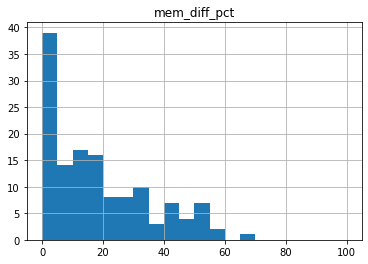

In [133]:
accre[(accre['account'] != 'horn') & (accre['account'] != 'casaba') & (accre['state']!='FAILED')].groupby('account')[['account', 'mem_diff_pct']].mean().hist(bins=20, range=(0,100));

In [67]:
#Alternate version, if we want to see more calculations of mem_diff_pct
#accre.groupby('account')[['account', 'mem_diff_pct']].agg({'mem_diff_pct': ['count', 'mean']})

In [107]:
#1 HIGHEST - horn - Looks to have a bunch where they only requested 1 MB.
accre[accre['state']!='FAILED'].loc[accre['account']=='horn'].sort_values('mem_diff_pct')

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,state,nodelist,exitcode_user,exitcode_node,reqmemory,core_node,usedmemory,mem_diff,mem_diff_pct,time_diff
1192179,19005116,horn,hjalmar,65536Mn,0,628200,15,1,4,production,...,COMPLETED,cn1228,0,0,16384.0,n,0.0,16384.0,0.0,628185
467733,17724575,horn,hjalmar,65536Mn,0,628200,9,1,4,production,...,COMPLETED,cn427,0,0,16384.0,n,0.0,16384.0,0.0,628191
1704397,19954861,horn,miya,3072Mn,0,628200,9,1,12,production,...,COMPLETED,cn373,0,0,256.0,n,0.0,256.0,0.0,628191
1704398,19954862,horn,miya,3072Mn,0,628200,6,1,12,production,...,COMPLETED,cn373,0,0,256.0,n,0.0,256.0,0.0,628194
1723078,19980284,horn,miya,3072Mn,0,628200,11,1,1,production,...,COMPLETED,cn304,0,0,3072.0,n,0.0,3072.0,0.0,628189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382700,17580933,horn,miya,1Mn,6.69M,628200,94,1,1,production,...,COMPLETED,cn430,0,0,1.0,n,6.7,-5.7,670.0,628106
382652,17580860,horn,miya,1Mn,6.70M,628200,120,1,1,production,...,COMPLETED,cn430,0,0,1.0,n,6.7,-5.7,670.0,628080
382680,17580910,horn,miya,1Mn,6.72M,628200,126,1,1,production,...,COMPLETED,cn421,0,0,1.0,n,6.7,-5.7,670.0,628074
382697,17580930,horn,miya,1Mn,6.75M,628200,132,1,1,production,...,COMPLETED,cn430,0,0,1.0,n,6.8,-5.8,680.0,628068


In [108]:
#If we remove outliers, we see that "horn" is not in the highest level of percentage users.
accre[accre['state']!='FAILED'].loc[(accre['account']=='horn') & (accre['reqmemory'] > 1)]['mem_diff_pct'].mean()

22.339764905255436

In [109]:
#2 HIGHEST - strawberries
accre[accre['state']!='FAILED'].loc[accre['account']=='strawberries'].sort_values('mem_diff_pct')

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,state,nodelist,exitcode_user,exitcode_node,reqmemory,core_node,usedmemory,mem_diff,mem_diff_pct,time_diff
1677584,19874412,strawberries,coleman,10240Mn,0,36000,13,1,1,production,...,COMPLETED,cn1261,0,0,10240.000000,n,0.0,10240.000000,0.000000,35987
2022399,20627165,strawberries,arnav,117760Mn,0,10800,8,1,6,production,...,COMPLETED,cn1524,0,0,19626.666667,n,0.0,19626.666667,0.000000,10792
2051505,20687391,strawberries,arnav,117760Mn,0,14400,6,1,6,production,...,COMPLETED,cn1365,0,0,19626.666667,n,0.0,19626.666667,0.000000,14394
2051928,20687902,strawberries,arnav,117760Mn,0,14400,26,1,6,production,...,COMPLETED,cn1365,0,0,19626.666667,n,0.0,19626.666667,0.000000,14374
2158265,20868687,strawberries,arnav,117760Mn,0,21600,8,1,12,production,...,COMPLETED,cn1507,0,0,9813.333333,n,0.0,9813.333333,0.000000,21592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680443,19883289_23,strawberries,coleman,35840Mn,27872.10M,10800,4863,1,2,production,...,COMPLETED,cn1288,0,0,17920.000000,n,13936.0,3984.000000,77.767857,5937
1680496,19883289_76,strawberries,coleman,35840Mn,27879.46M,10800,4298,1,2,production,...,COMPLETED,cn1232,0,0,17920.000000,n,13939.7,3980.300000,77.788504,6502
2052094,20688024,strawberries,arnav,117760Mn,117202.27M,14400,773,1,6,production,...,COMPLETED,cn1293,0,0,19626.666667,n,19533.7,92.966667,99.526325,13627
2052147,20688201,strawberries,arnav,117760Mn,117759.82M,14400,834,1,6,production,...,COMPLETED,cn1281,0,0,19626.666667,n,19626.6,0.066667,99.999660,13566


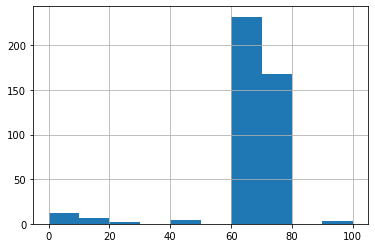

In [110]:
accre[accre['state']!='FAILED'].loc[accre['account']=='strawberries']['mem_diff_pct'].hist();

In [111]:
#3 HIGHEST - jicama
accre[accre['state']!='FAILED'].loc[accre['account']=='jicama'].sort_values('mem_diff_pct')

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,state,nodelist,exitcode_user,exitcode_node,reqmemory,core_node,usedmemory,mem_diff,mem_diff_pct,time_diff
1677709,19875061_325,jicama,gennaro,235520Mn,0.09M,216000,14745,1,12,production,...,COMPLETED,cn1293,0,0,19626.666667,n,0.0,19626.666667,0.00000,201255
1618712,19730391_2725,jicama,gennaro,204800Mn,0.08M,129600,1695,1,8,production,...,COMPLETED,cn1502,0,0,25600.000000,n,0.0,25600.000000,0.00000,127905
1618714,19730391_3025,jicama,gennaro,204800Mn,0.09M,129600,1868,1,8,production,...,COMPLETED,cn1494,0,0,25600.000000,n,0.0,25600.000000,0.00000,127732
1629971,19761854_3175,jicama,gennaro,235520Mn,0.08M,129600,69032,1,12,production,...,COMPLETED,cn1499,0,0,19626.666667,n,0.0,19626.666667,0.00000,60568
1679311,19880797_1525,jicama,gennaro,235520Mn,0.08M,216000,1991,1,12,production,...,COMPLETED,cn1297,0,0,19626.666667,n,0.0,19626.666667,0.00000,214009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618705,19730391_1675,jicama,gennaro,204800Mn,204799.79M,129600,1976,1,8,production,...,COMPLETED,cn1497,0,0,25600.000000,n,25600.0,0.000000,100.00000,127624
1629963,19761854_1975,jicama,gennaro,235520Mn,235519.86M,129600,68703,1,12,production,...,COMPLETED,cn1502,0,0,19626.666667,n,19626.7,-0.033333,100.00017,60897
1629955,19761854_775,jicama,gennaro,235520Mn,235519.92M,129600,72393,1,12,production,...,COMPLETED,cn1362,0,0,19626.666667,n,19626.7,-0.033333,100.00017,57207
1629956,19761854_925,jicama,gennaro,235520Mn,235519.81M,129600,77862,1,12,production,...,COMPLETED,cn1383,0,0,19626.666667,n,19626.7,-0.033333,100.00017,51738


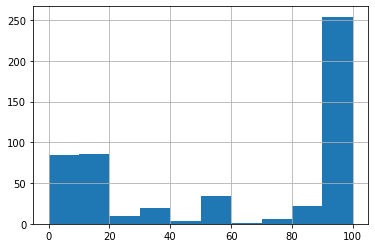

In [78]:
accre.loc[accre['account']=='jicama']['mem_diff_pct'].hist();

In [112]:
#4 HIGHEST - shallots
accre[accre['state']!='FAILED'].loc[accre['account']=='shallots'].sort_values('mem_diff_pct')

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,state,nodelist,exitcode_user,exitcode_node,reqmemory,core_node,usedmemory,mem_diff,mem_diff_pct,time_diff
1414075,19370642_466,shallots,chrissie,5120Mn,0.08M,172800,156,1,1,production,...,COMPLETED,cn1135,0,0,5120.0,n,0.1,5119.9,0.001953,172644
555932,17867570_0,shallots,chrissie,12288Mn,4.68M,345600,65,1,1,production,...,COMPLETED,cn1278,0,0,12288.0,n,4.7,12283.3,0.038249,345535
555954,17867570_24,shallots,chrissie,12288Mn,4.73M,345600,88,1,1,production,...,COMPLETED,cn391,0,0,12288.0,n,4.7,12283.3,0.038249,345512
555953,17867570_23,shallots,chrissie,12288Mn,4.70M,345600,57,1,1,production,...,COMPLETED,cn1346,0,0,12288.0,n,4.7,12283.3,0.038249,345543
555952,17867570_22,shallots,chrissie,12288Mn,4.69M,345600,61,1,1,production,...,COMPLETED,cn1345,0,0,12288.0,n,4.7,12283.3,0.038249,345539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414016,19370642_407,shallots,chrissie,5120Mn,5119.98M,172800,192,1,1,production,...,COMPLETED,cn421,0,0,5120.0,n,5120.0,0.0,100.000000,172608
1413660,19370642_50,shallots,chrissie,5120Mn,5120.00M,172800,218,1,1,production,...,COMPLETED,cn1096,0,0,5120.0,n,5120.0,0.0,100.000000,172582
1413661,19370642_51,shallots,chrissie,5120Mn,5119.97M,172800,169,1,1,production,...,COMPLETED,cn1124,0,0,5120.0,n,5120.0,0.0,100.000000,172631
1413996,19370642_387,shallots,chrissie,5120Mn,5120.00M,172800,213,1,1,production,...,COMPLETED,cn421,0,0,5120.0,n,5120.0,0.0,100.000000,172587


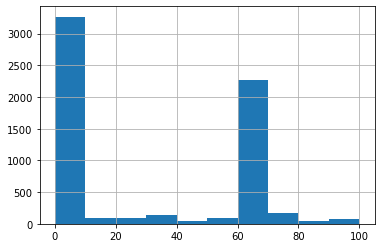

In [113]:
accre[accre['state']!='FAILED'].loc[accre['account']=='muscat']['mem_diff_pct'].hist();

In [114]:
#GOAL - Make list of groups with under 1% average memory usage.
under_one = accre[accre['state']!='FAILED'].groupby('account')[['account', 'mem_diff_pct']].mean()
under_one = under_one[under_one['mem_diff_pct'] < 1].index.tolist()
under_one

['angelys',
 'cocktail',
 'crab',
 'discovery',
 'flamingo',
 'florence',
 'grisette',
 'hass',
 'mung',
 'plantain',
 'plumcot',
 'president',
 'romanesco',
 'wa',
 'with']

In [144]:
over_fifty = accre[(accre['account'] != 'horn') | (accre['state']!='FAILED')].groupby('account')[['account', 'mem_diff_pct']].mean()
over_fifty = over_fifty[over_fifty['mem_diff_pct'] < 1].index.tolist()
over_fifty

['angelys',
 'cocktail',
 'crab',
 'discovery',
 'flamingo',
 'florence',
 'grisette',
 'hass',
 'mung',
 'plumcot',
 'president',
 'romanesco',
 'wa',
 'with']

In [87]:
def convert_time_to_seconds(time):
    """Return an integer value of the time converted into seconds."""
    #Identify values not formatted as d-hh:mm:ss. Fill in the hour value by appending '0-' on the left of the string. 
    #This will make all our strings cleanly parse into an equal number of substrings.
    if len(time) <9:
        time = "0-" + time
    else: time
    #Use regex to select either '-' OR ':' as delimiter for split. The resulting substring list is ordered as [days, hours, minutes, seconds]
    #Cast the list of substrings to numeric, turning it into an array. Cleaner to do it here than for each individual substring
    time = pd.to_numeric(re.split('[-|:]',time))
    #Add the product of each unit and its multiplier to get the total time in seconds
    time_in_seconds = time[-4]*86400 + time[-3]*3600 + time[-2]*60 + time[-1]
    return time_in_seconds
#Change existing time columns to time in seconds.
accre['reqtime'] = accre['reqtime'].apply(convert_time_to_seconds)
accre['usedtime'] = accre['usedtime'].apply(convert_time_to_seconds)
#Create new column to reflect difference between requested time and used time.
accre['time_diff'] = accre['reqtime'] - accre['usedtime']

<ipython-input-87-a13d32799eb0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['reqtime'] = accre['reqtime'].apply(convert_time_to_seconds)
<ipython-input-87-a13d32799eb0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['usedtime'] = accre['usedtime'].apply(convert_time_to_seconds)
<ipython-input-87-a13d32799eb0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [89]:
accre.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,state,nodelist,exitcode_user,exitcode_node,reqmemory,core_node,usedmemory,mem_diff,mem_diff_pct,time_diff
0,15925210,treviso,arabella,122880Mn,65973.49M,1188000,1188028,1,24,production,...,COMPLETED,cn1531,0,0,5120.0,n,2748.9,2371.1,53.689453,-28
1,15861126,treviso,arabella,122880Mn,67181.12M,1188000,1090256,1,24,production,...,COMPLETED,cn1441,0,0,5120.0,n,2799.2,2320.8,54.671875,97744
2,15861125,treviso,arabella,122880Mn,69111.86M,1188000,1188020,1,24,production,...,COMPLETED,cn1464,0,0,5120.0,n,2879.7,2240.3,56.244141,-20
3,16251645,treviso,arabella,122880Mn,65317.33M,1188000,1050632,1,24,production,...,COMPLETED,cn1473,0,0,5120.0,n,2721.6,2398.4,53.156250,137368
4,16251646,treviso,arabella,122880Mn,65876.11M,1188000,1188003,1,24,production,...,COMPLETED,cn1440,0,0,5120.0,n,2744.8,2375.2,53.609375,-3


In [90]:
accre['state'].value_counts()

COMPLETED              3300047
CANCELLED                 4968
RUNNING                   2859
CANCELLED by 686562        681
FAILED                     395
TIMEOUT                     79
OUT_OF_MEMORY               38
CANCELLED by 855431         17
CANCELLED by 397600          7
CANCELLED by 782611          6
CANCELLED by 200557          4
CANCELLED by 0               4
CANCELLED by 199766          3
CANCELLED by 895426          2
CANCELLED by 693461          2
CANCELLED by 649319          2
CANCELLED by 546080          2
CANCELLED by 9201            2
CANCELLED by 791651          1
CANCELLED by 515423          1
CANCELLED by 503585          1
CANCELLED by 199066          1
CANCELLED by 483348          1
CANCELLED by 781109          1
Name: state, dtype: int64

In [141]:
#QUESTION 1 - FIND MOST COMMONLY FAILING NODES. CODE OPTION #1 - based on the exit code
accre[accre['exitcode_node']!=0]['nodelist'].value_counts(sort=True).head(10)

cn363     9
cn304     8
cn416     8
cn394     7
cn1277    6
cn405     6
cn1081    6
cn1341    5
cn1261    5
cn449     5
Name: nodelist, dtype: int64

In [142]:
#QUESTION 1 - FIND MOST COMMONLY FAILING NODES. CODE OPTION #2 - based on the state
accre[accre['state']=='FAILED']['nodelist'].value_counts(sort=True).head(10)

cn1273           9
cn1458           6
cn1364           6
cn304            6
cn[1530-1531]    5
cn1450           5
cn1270           5
cn1479           5
cn1278           4
cn1448           4
Name: nodelist, dtype: int64

In [143]:
#QUESTION 1 - FIND MOST COMMONLY FAILING NODES. CODE OPTION #3 - based on the both
accre[(accre['state']=='FAILED') | (accre['exitcode_node']!=0)]['nodelist'].value_counts(sort=True).head(10)

cn304     14
cn416     11
cn363      9
cn394      9
cn1273     9
cn1364     9
cn1267     8
cn1261     8
cn382      7
cn1433     7
Name: nodelist, dtype: int64

In [145]:
accre.head()

,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,state,nodelist,exitcode_user,exitcode_node,reqmemory,core_node,usedmemory,mem_diff,mem_diff_pct,time_diff
0,15925210,treviso,arabella,122880Mn,65973.49M,1188000,1188028,1,24,production,...,COMPLETED,cn1531,0,0,5120.0,n,2748.9,2371.1,53.689453,-28
1,15861126,treviso,arabella,122880Mn,67181.12M,1188000,1090256,1,24,production,...,COMPLETED,cn1441,0,0,5120.0,n,2799.2,2320.8,54.671875,97744
2,15861125,treviso,arabella,122880Mn,69111.86M,1188000,1188020,1,24,production,...,COMPLETED,cn1464,0,0,5120.0,n,2879.7,2240.3,56.244141,-20
3,16251645,treviso,arabella,122880Mn,65317.33M,1188000,1050632,1,24,production,...,COMPLETED,cn1473,0,0,5120.0,n,2721.6,2398.4,53.156250,137368
4,16251646,treviso,arabella,122880Mn,65876.11M,1188000,1188003,1,24,production,...,COMPLETED,cn1440,0,0,5120.0,n,2744.8,2375.2,53.609375,-3


In [147]:
#Groupby accounts, only looking at usedmem percentage
accre[accre['state']!='FAILED'].groupby(
    'account')[['account', 'reqtime', 'mem_diff_pct']].mean().sort_values(
    'mem_diff_pct').head(10)

,reqtime,mem_diff_pct
account,,
hass,1200.0,0.000000
discovery,1200.0,0.000000
florence,120.0,0.000000
with,1200.0,0.000000
president,87000.0,0.000000
wa,1200.0,0.000000
flamingo,1200.0,0.000000
romanesco,173400.0,0.089111
plumcot,26400.0,0.216471


In [149]:
accre['weighted_mem'] = accre['mem_diff_pct'] * accre['reqtime'] / accre['reqtime'].sum()
accre.head()

<ipython-input-149-394fcce4b8dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['weighted_mem'] = accre['mem_diff_pct'] * accre['reqtime'] / accre['reqtime'].sum()


,jobid,account,user,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,...,nodelist,exitcode_user,exitcode_node,reqmemory,core_node,usedmemory,mem_diff,mem_diff_pct,time_diff,weighted_mem
0,15925210,treviso,arabella,122880Mn,65973.49M,1188000,1188028,1,24,production,...,cn1531,0,0,5120.0,n,2748.9,2371.1,53.689453,-28,0.000176
1,15861126,treviso,arabella,122880Mn,67181.12M,1188000,1090256,1,24,production,...,cn1441,0,0,5120.0,n,2799.2,2320.8,54.671875,97744,0.000179
2,15861125,treviso,arabella,122880Mn,69111.86M,1188000,1188020,1,24,production,...,cn1464,0,0,5120.0,n,2879.7,2240.3,56.244141,-20,0.000184
3,16251645,treviso,arabella,122880Mn,65317.33M,1188000,1050632,1,24,production,...,cn1473,0,0,5120.0,n,2721.6,2398.4,53.156250,137368,0.000174
4,16251646,treviso,arabella,122880Mn,65876.11M,1188000,1188003,1,24,production,...,cn1440,0,0,5120.0,n,2744.8,2375.2,53.609375,-3,0.000176


In [154]:
#Create a column of each job's weighted percentage of memory use.
accre['weighted_mem'] = accre['mem_diff_pct'] * accre['reqtime'] / accre['reqtime'].sum()
#Group weighted averages and find mean per account.
accre[accre['state']!='FAILED'].groupby(
    'account')[['account', 'weighted_mem']].mean().sort_values('weighted_mem').head(10)

,weighted_mem
account,
discovery,0.000000e+00
with,0.000000e+00
wa,0.000000e+00
florence,0.000000e+00
hass,0.000000e+00
president,0.000000e+00
flamingo,0.000000e+00
angelys,1.220064e-08
plumcot,1.632192e-08


In [163]:
accre[['reqtime', 'mem_diff_pct', 'weighted_mem']] .sort_values('mem_diff_pct', inplace=True).iloc[3200000:3200010]

<ipython-input-163-a0436e9ce8d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre[['reqtime', 'mem_diff_pct', 'weighted_mem']] .sort_values('mem_diff_pct', inplace=True).iloc[3200000:3200010]


AttributeError: 'NoneType' object has no attribute 'iloc'